In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import random

warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/FYP Datasets/'
df_col = pd.read_csv(path + 'col_dict_2.csv')
col_dict = dict(df_col.to_numpy())

df = pd.read_csv(path + 'final_2.csv', dtype = col_dict)

df.shape

(5922853, 51)

In [ ]:
df.tail()

,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Length,Bwd_Header_Length,Bwd_Packets/s,Max_Packet_Length,Packet_Length_Std,Packet_Length_Variance,SYN_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,Down/Up_Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Idle_Std,Idle_Min,Inbound,Label
5922848,3394327.0,247.0,658.0,554.0,53117.0,17.0,203902.0,657.0,34.0,0.0,14960.0,440.0,0.0,0.0,0.0,0.0,0.0,2.277017e+07,5.175038e+04,19.90909,46.90107,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
5922849,3304444.0,247.0,648.0,554.0,42732.0,17.0,2087944.0,49.0,2.0,0.0,458.0,229.0,0.0,0.0,0.0,0.0,0.0,9.346939e+06,4.081633e+04,49.00000,0.00000,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
5922850,421339.0,247.0,27294.0,554.0,61673.0,17.0,2020823.0,1.0,2.0,0.0,1736.0,868.0,0.0,0.0,0.0,0.0,0.0,1.736000e+09,2.000000e+06,1.00000,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,868.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,3
5922851,2929678.0,247.0,62619.0,554.0,6707.0,17.0,4965745.0,1.0,2.0,0.0,1032.0,516.0,0.0,0.0,0.0,0.0,0.0,1.032000e+09,2.000000e+06,1.00000,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1032.0,0.0,0.0,516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,516.0,0.0,0.0,0.0,0.0,0.0,1.0,9
5922852,3602812.0,247.0,698.0,554.0,11480.0,17.0,1507413.0,1.0,2.0,0.0,2944.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.00000,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [ ]:
#CNN 
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#for spliting data into training and testing 
from sklearn.model_selection import train_test_split

#CNN algorithm libraries
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
standardScaler = StandardScaler()
X= standardScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = Sequential()
model.add(Dense(64,input_shape=(50,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(13))
model.add(Activation('softmax'))
model.summary()
adam = keras.optimizers.Adam(lr=0.001)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

# rmsprop = keras.optimizers.rmsprop(lr=0.001)
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=rmsprop,
#               metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 13)               

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=100,callbacks=[monitor],validation_split=0.2)

Epoch 1/100
59229/59229 [==============================] - 151s 3ms/step - loss: 0.0474 - acc: 0.9841 - val_loss: 0.0394 - val_acc: 0.9855
Epoch 2/100
59229/59229 [==============================] - 152s 3ms/step - loss: 0.0446 - acc: 0.9849 - val_loss: 0.0306 - val_acc: 0.9897
Epoch 3/100
59229/59229 [==============================] - 153s 3ms/step - loss: 0.0435 - acc: 0.9855 - val_loss: 0.0322 - val_acc: 0.9871
Epoch 4/100
59229/59229 [==============================] - 152s 3ms/step - loss: 0.0416 - acc: 0.9858 - val_loss: 0.0278 - val_acc: 0.9914
Epoch 5/100
59229/59229 [==============================] - 152s 3ms/step - loss: 0.0417 - acc: 0.9863 - val_loss: 0.0259 - val_acc: 0.9915
Epoch 6/100
59229/59229 [==============================] - 152s 3ms/step - loss: 0.0398 - acc: 0.9866 - val_loss: 0.0314 - val_acc: 0.9881
Epoch 7/100
59229/59229 [==============================] - 152s 3ms/step - loss: 0.0387 - acc: 0.9870 - val_loss: 0.0316 - val_acc: 0.9884
Epoch 8/100
59229/59229 [==

In [ ]:
accr = model.evaluate(X_test,y_test)

37018/37018 [==============================] - 66s 2ms/step - loss: 0.0263 - acc: 0.9914


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred=y_pred.argmax(axis=1)
print('Test set\n  Accuracy: {:0.2f}'.format(accr[1]))

print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred)
print(CR)
print('\n')

Test set
  Accuracy: 0.99


Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98728
           1       0.99      1.00      1.00     99706
           2       0.99      1.00      0.99     99780
           3       0.99      0.99      0.99    100308
           4       1.00      1.00      1.00     99691
           5       1.00      0.99      0.99     99739
           6       0.98      1.00      0.99    100159
           7       0.98      0.98      0.98     99940
           8       0.98      1.00      0.99     87393
           9       1.00      0.99      0.99    100249
          10       0.99      0.97      0.98    100124
          11       0.99      0.99      0.99     98754

    accuracy                           0.99   1184571
   macro avg       0.99      0.99      0.99   1184571
weighted avg       0.99      0.99      0.99   1184571





Confusion Matrix

 [[98699     0     0     0    14     0     4     0     0     0     0    11]
 [    3 99355    64     0   283     0     1     0     0     0     0     0]
 [    2   400 99330    18    16     0    14     0     0     0     0     0]
 [    0     0   547 99730     3    20     8     0     0     0     0     0]
 [   16   190     0     0 99485     0     0     0     0     0     0     0]
 [    0     0     0  1216    14 98276   233     0     0     0     0     0]
 [    2     0     0     1     7   396 99746     4     0     0     0     3]
 [    1     0     0     0     1     2  1570 98299     1     0    55    11]
 [    0     0     0     0     0     0    12     0 87071     4     0   306]
 [    2     0     0     0     0     0     0     0  1481 98762     0     4]
 [    5     0     0     0     1     1     4  1928     0     0 97540   645]
 [    1     0     0     0     0     0    11     0   106     0   552 98084]]




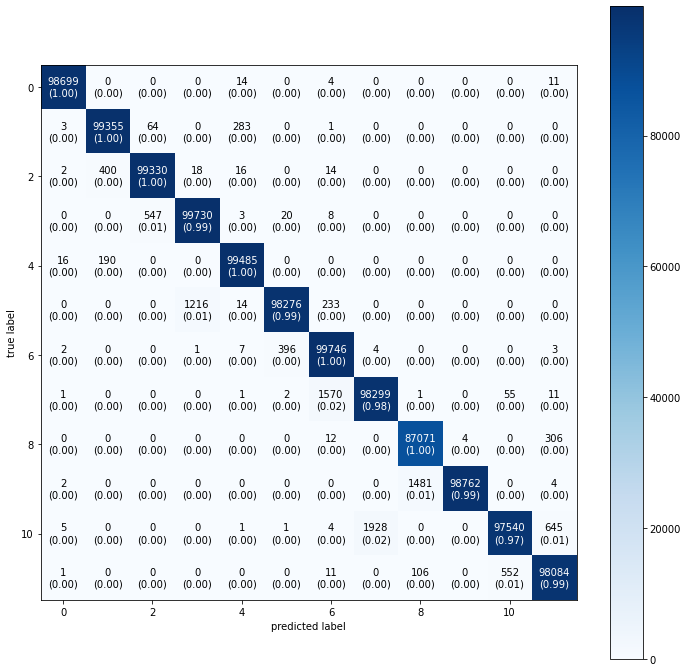

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n', cm)

print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(12, 12),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print('\n')